import liberary

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


Load the dataset

In [ ]:
df= pd.read_csv('/content/Fertility_dataset.csv')


printing dataset

In [ ]:
df

,Season,Age,Disease,Accident_Trauma,Surgery,Fever_in_last_year,Alchol_consumption,Smoking,Sitting_time,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,1
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,1
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,1
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,0
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,1
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,1
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,1
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,1


Describing the dataset

In [ ]:
df.describe()

,Season,Age,Disease,Accident_Trauma,Surgery,Fever_in_last_year,Alchol_consumption,Smoking,Sitting_time,Output
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.078900,0.669000,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000,0.406800,0.880000
std,0.796725,0.121319,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728,0.186395,0.326599
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000,0.000000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000,1.000000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000,1.000000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Season              100 non-null    float64
 1   Age                 100 non-null    float64
 2   Disease             100 non-null    int64  
 3   Accident_Trauma     100 non-null    int64  
 4   Surgery             100 non-null    int64  
 5   Fever_in_last_year  100 non-null    int64  
 6   Alchol_consumption  100 non-null    float64
 7   Smoking             100 non-null    int64  
 8   Sitting_time        100 non-null    float64
 9   Output              100 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 7.9 KB


**PCA(Feature selection elemination)**

Import Liberaries

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
from sklearn.decomposition import PCA

 Split the data into training and testing sets

In [ ]:
X=df[['Season',	'Age',	'Disease',	'Accident_Trauma',	'Surgery',	'Fever_in_last_year',	'Alchol_consumption',	'Smoking','Sitting_time']]
y=df[['Output']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Applying PCA for dimnesionality reduction

In [ ]:
pca=PCA(n_components = 4 )
X_train_pca = pca.fit(X_train)
X_test_pca = pca.fit(X_test)

In [ ]:
print(X_train_pca)
print(X_test_pca)

PCA(n_components=4)
PCA(n_components=4)


In [ ]:
print(X)
print(y)

    Season   Age  Disease  Accident_Trauma  Surgery  Fever_in_last_year  \
0    -0.33  0.69        0                1        1                   0   
1    -0.33  0.94        1                0        1                   0   
2    -0.33  0.50        1                0        0                   0   
3    -0.33  0.75        0                1        1                   0   
4    -0.33  0.67        1                1        0                   0   
..     ...   ...      ...              ...      ...                 ...   
95   -1.00  0.67        1                0        0                   0   
96   -1.00  0.61        1                0        0                   0   
97   -1.00  0.67        1                1        1                   0   
98   -1.00  0.64        1                0        1                   0   
99   -1.00  0.69        0                1        1                   0   

    Alchol_consumption  Smoking  Sitting_time  
0                  0.8        0          0.88  
1  

**Decision Tree**

Import Liberaries

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, f1_score,mean_squared_error, r2_score
from sklearn.metrics import precision_score

Training the Decisin Tree Classification model on training set

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

Making the Confusion Matrix and find the Accuracy

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy_DT)

[[ 0  2]
 [ 0 18]]
Accuracy:  0.9


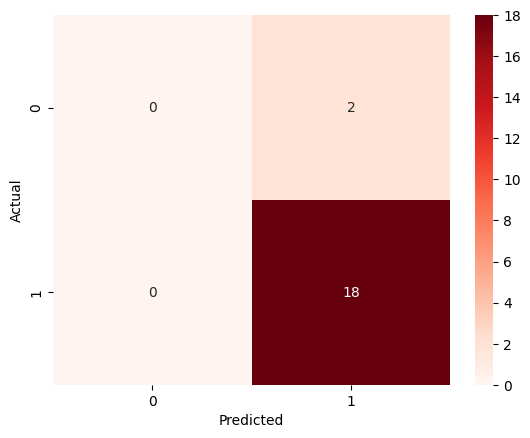

In [ ]:
#Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(y_test)


    Output
83       1
53       1
70       0
45       1
44       1
39       1
22       1
80       1
10       1
0        1
18       1
30       1
73       1
33       1
90       1
4        0
76       1
77       1
12       1
31       1


In [ ]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Calculate evaluation metrics
accuracy_DT = accuracy_score(y_test, y_pred)
precision_DT = precision_score(y_test, y_pred, pos_label=1)
f1_DT = f1_score(y_test, y_pred, pos_label=1)
mse_DT = mean_squared_error(y_test, y_pred)
rmse_DT = np.sqrt(mse_DT)
mae_DT = mean_absolute_error(y_test, y_pred)

#Print the evaluation metrics
print("Accuracy:", accuracy_DT)
print("Precision:", precision_DT)
print("F1 Score:", f1_DT)
print("Mean Squared Error:", mse_DT)
print("Root Mean Squared Error:", rmse_DT)
print("Mean Absolute Error:", mae_DT)

Accuracy: 0.9
Precision: 0.9
F1 Score: 0.9473684210526316
Mean Squared Error: 0.1
Root Mean Squared Error: 0.31622776601683794
Mean Absolute Error: 0.1


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


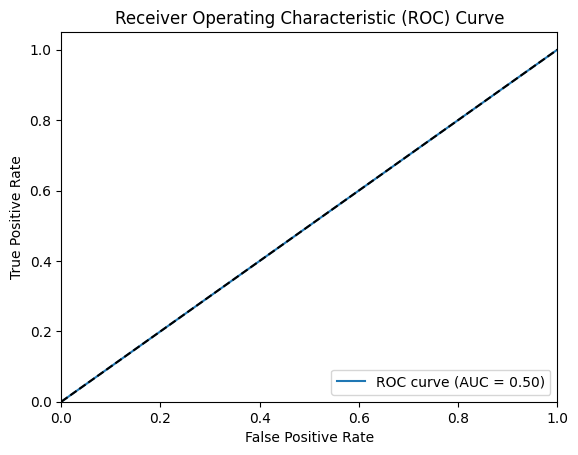

In [ ]:
# Make predictions on the test set
y_scores = classifier.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Spliting the Training and Testing dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=39)

Training the Decisin Tree Classification model on training set

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


<ipython-input-253-a34df6a48b00>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

Predicting the Test set results

In [ ]:
y_pred_rf = rf_classifier.predict(X_test)

Making confusion matrix and find Accuracy

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
accuracy_RF = accuracy_score(y_test, y_pred_rf)
print('Accuracy: ', accuracy_RF)

[[ 1  1]
 [ 0 18]]
Accuracy:  0.95


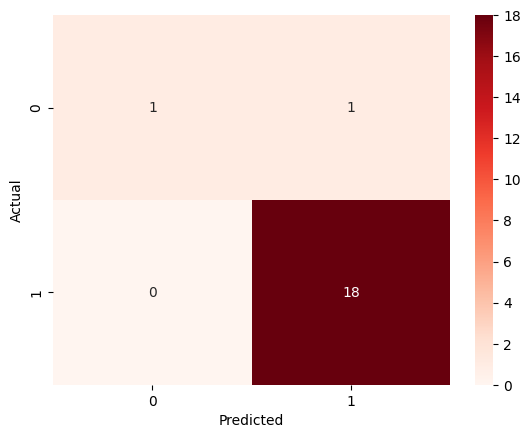

In [ ]:
#Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Calculate evaluation metrics
accuracy_RF = accuracy_score(y_test, y_pred_rf)
precision_RF = precision_score(y_test, y_pred_rf, pos_label=1 )
f1_RF = f1_score(y_test, y_pred, pos_label=1)
mse_RF = mean_squared_error(y_test, y_pred_rf)
rmse_RF = np.sqrt(mse_RF)
mae_RF = mean_absolute_error(y_test, y_pred_rf)

# Print the evaluation metrics
print("Accuracy:", accuracy_RF)
print("Precision:", precision_RF)
print("F1 Score:", f1_RF)
print("Mean Squared Error:", mse_RF)
print("Root Mean Squared Error:", rmse_RF)
print("Mean Absolute Error:", mae_RF)

Accuracy: 0.95
Precision: 0.9473684210526315
F1 Score: 0.9473684210526316
Mean Squared Error: 0.1
Root Mean Squared Error: 0.31622776601683794
Mean Absolute Error: 0.1


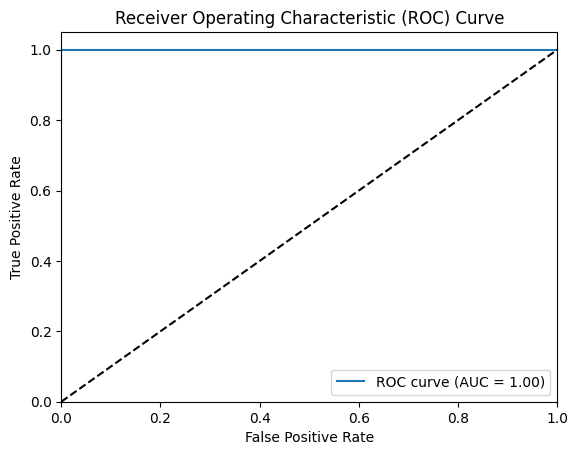

In [ ]:
# Make predictions on the test set
y_scores = classifier.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**2.Regression**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

Spliting Data in training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Making confusion Matrix and predictiong Accuracy

[[ 0  2]
 [ 0 28]]
Accuracy:  0.9333333333333333


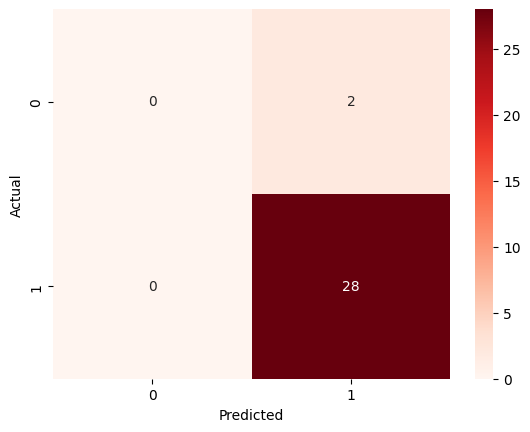

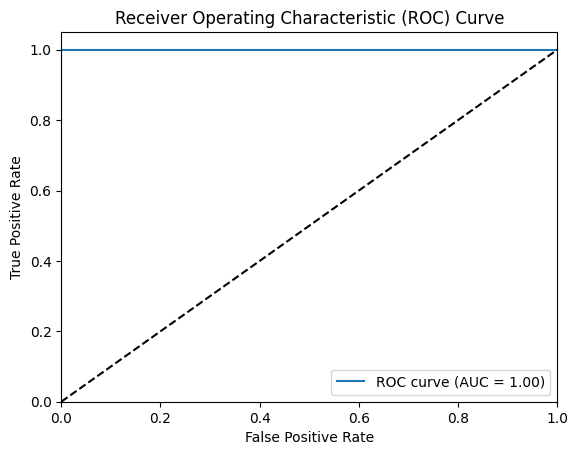

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
accuracy_LR = accuracy_score(y_test, y_pred_lr)
print('Accuracy: ', accuracy_LR)

#Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Make predictions on the test set
y_scores = classifier.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Calculate evaluation metrics
accuracy_LR = accuracy_score(y_test, y_pred_lr)
precision_LR = precision_score(y_test, y_pred_lr, pos_label=1 )
f1_LR = f1_score(y_test, y_pred_lr, pos_label=1)
mse_LR = mean_squared_error(y_test, y_pred_lr)
rmse_LR = np.sqrt(mse_LR)
mae_LR = mean_absolute_error(y_test, y_pred_lr)

# Print the evaluation metrics
print("Accuracy:", accuracy_LR)
print("Precision:", precision_LR)
print("F1 Score:", f1_LR)
print("Mean Squared Error:", mse_LR)
print("Root Mean Squared Error:", rmse_LR)
print("Mean Absolute Error:", mae_LR)

Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
F1 Score: 0.9655172413793104
Mean Squared Error: 0.06666666666666667
Root Mean Squared Error: 0.2581988897471611
Mean Absolute Error: 0.06666666666666667


**Multivariant Linear Regression**

import liberaries and model training

In [ ]:
from sklearn.linear_model import LinearRegression
model_mr = LinearRegression()
model_mr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#predection of test set
y_pred = model_mr.predict(X_test)

Reg no:22MCS0014
Mean Absolute Error (MAE): 0.25823196287787
Mean Squared Error (MSE): 0.10994341694796027
Root Mean Squared Error (RMSE): 0.3315771659025396
R-Squared (R2) Score: -0.7669477723779328


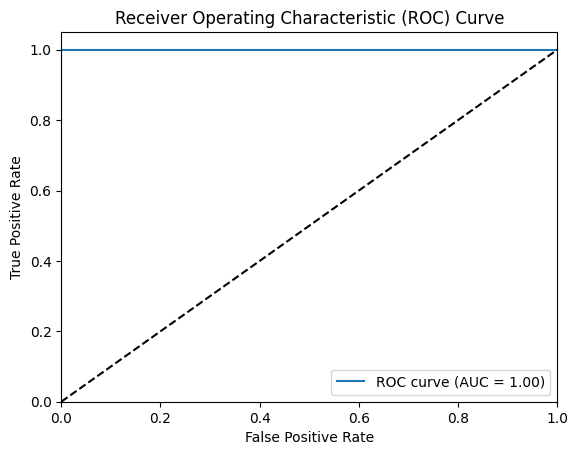

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics
print('Reg no:22MCS0014')
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-Squared (R2) Score:', r2)

# Calculate the fpr, tpr, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Conclusion**

**Accuracy Comparision**

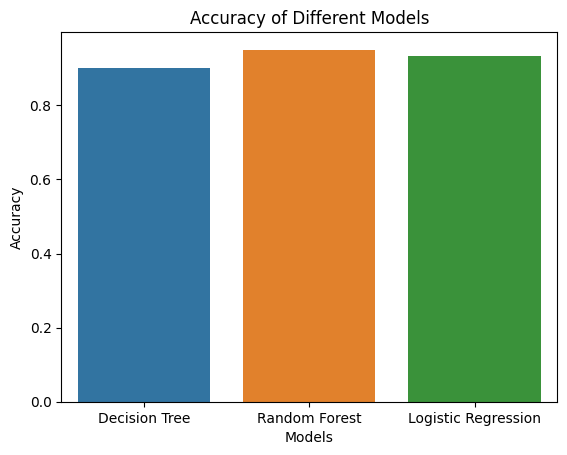

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have computed the accuracy scores for each model
accuracy_scores = [accuracy_DT, accuracy_RF,accuracy_LR]
models = [  'Decision Tree','Random Forest','Logistic Regression']

# Plot the accuracy scores
sns.barplot(x=models, y=accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
# Display the plot
plt.show()

**Precision Comparision**

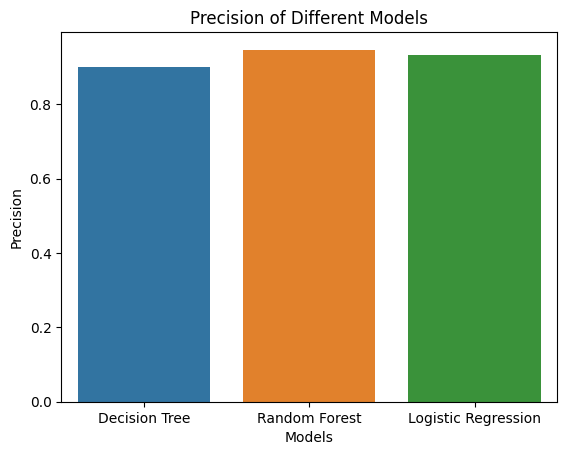

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have computed the accuracy scores for each model
precision_scores = [precision_DT, precision_RF,precision_LR]
models = [  'Decision Tree','Random Forest','Logistic Regression']

# Plot the accuracy scores
sns.barplot(x=models, y=precision_scores)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
# Display the plot
plt.show()

**MSE_Score Realatioship**

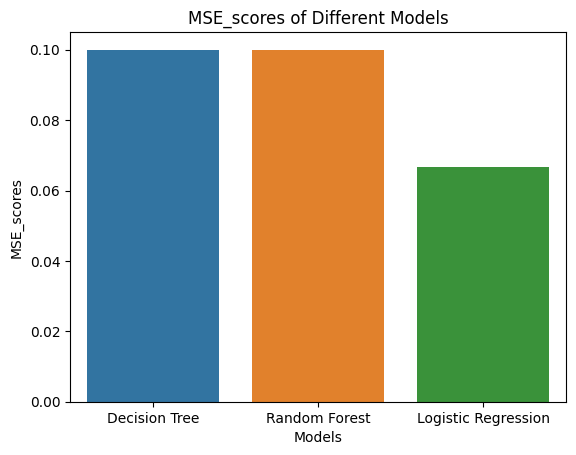

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have computed the accuracy scores for each model
MSE_scores = [mse_DT, mse_RF,mse_LR]
models = [  'Decision Tree','Random Forest','Logistic Regression']

# Plot the accuracy scores
sns.barplot(x=models, y=MSE_scores)
plt.xlabel('Models')
plt.ylabel('MSE_scores')
plt.title('MSE_scores of Different Models')
# Display the plot
plt.show()

**MAE Relatioship**

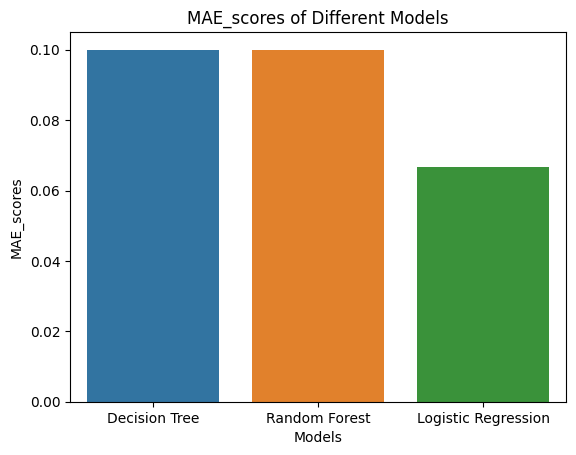

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have computed the accuracy scores for each model
MAE_scores = [mae_DT, mae_RF,mae_LR]
models = [  'Decision Tree','Random Forest','Logistic Regression']

# Plot the accuracy scores
sns.barplot(x=models, y=MAE_scores)
plt.xlabel('Models')
plt.ylabel('MAE_scores')
plt.title('MAE_scores of Different Models')
# Display the plot
plt.show()